# Churn Analysis 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, I analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.



In [19]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
telco_data=pd.read_csv('E:\Data Science\Projects\MLProject-ChurnPrediction-main\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_data.shape

(7043, 21)

In [7]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [21]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Check the descriptive statisitcs of numeric variables
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count of Target Variable per Category')

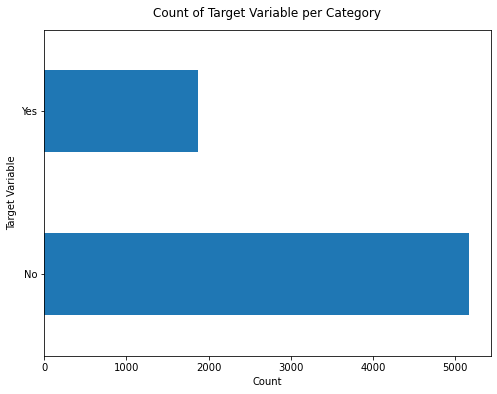

In [18]:
telco_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('Count')
plt.ylabel('Target Variable')
plt.title('Count of Target Variable per Category',y=1.02)

In [20]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced.

In [26]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We don't have any missing values here.

# Data Cleaning

Copy of the original data

In [27]:
telco_copy=telco_data.copy()

As we saw from the .info(), Total Charges has been identified as an object. But it needs to be converted to a numerical vairable. 

In [31]:
telco_copy.TotalCharges=pd.to_numeric(telco_copy.TotalCharges, errors='coerce')


In [33]:
telco_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see there are 11 missing values in TotalCharges column. 

In [35]:
telco_copy.loc[telco_copy.TotalCharges.isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of these missing values to total dataset is very low (0.15%), it is safe to ignore them from further processing.

In [37]:
telco_copy.dropna(how='any',inplace=True)

Next, group the customers into bins based on tenure.

In [38]:
print(telco_copy['tenure'].max())

72


In [40]:
#Group the tenure in bins of 12 months
labels=['{0}-{1}'.format(i,i+11) for i in range(1,72,12)]
telco_copy['tenure_group']=pd.cut(telco_copy.tenure,range(1,80,12), right=False, labels=labels)

In [41]:
telco_copy.tenure_group.value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

 Since the 'customerID','tenure' columns are not required for processing, I remove them.

In [42]:
#drop columns
telco_copy.drop(columns=['customerID','tenure'],axis=1,inplace=True)
telco_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

**Convert all categorical variables into dummy variables**

In [54]:
telco_copy_dummies=pd.get_dummies(telco_copy)
telco_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**Churn by Monthly Charges and Total Charges**

Text(0.5, 1.0, 'Monthly charges by churn')

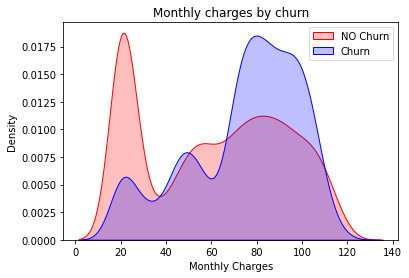

In [60]:
Mth=sns.kdeplot(telco_copy_dummies.MonthlyCharges[(telco_copy_dummies['Churn']==0)],
                color='Red',shade=True)
Mth=sns.kdeplot(telco_copy_dummies.MonthlyCharges[(telco_copy_dummies['Churn']==1)],
                ax=Mth, color='Blue',shade=True)
Mth.legend(['NO Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight;** Churn is high when Monthly Charges are high. 

Text(0.5, 1.0, 'Total charges by churn')

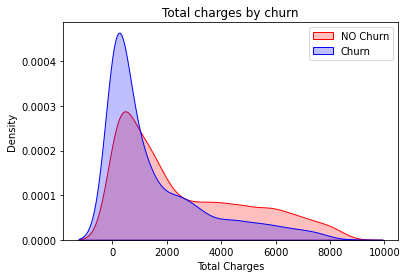

In [61]:
Mth=sns.kdeplot(telco_copy_dummies.TotalCharges[(telco_copy_dummies['Churn']==0)],
                color='Red',shade=True)
Mth=sns.kdeplot(telco_copy_dummies.TotalCharges[(telco_copy_dummies['Churn']==1)],
                ax=Mth, color='Blue',shade=True)
Mth.legend(['NO Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

**Insight**; Higher churn at lower total charges

<AxesSubplot:>

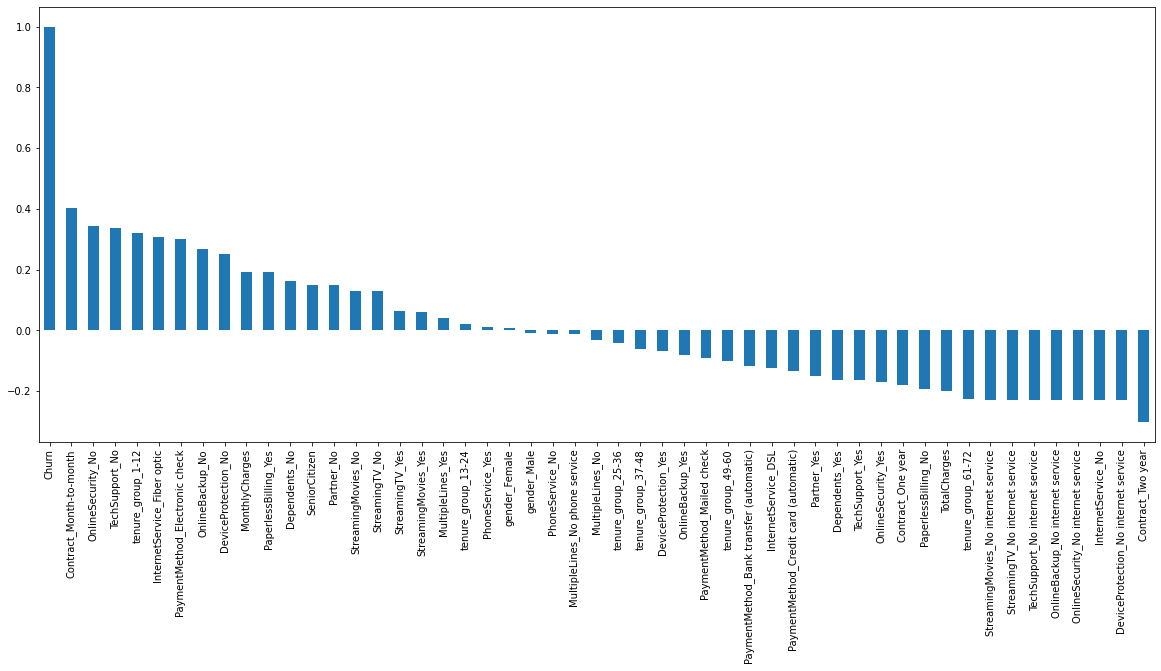

In [62]:
plt.figure(figsize=(20,8))
telco_copy_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Insight;** 

**High Churn** seen in case of month to month contracts, No online security, No tech support, First year subscription and Fiber optics internet.

**Low Churn** can be seen in case of Long term contracts, Subcription without internet Service and The customer engaged for 5 years

Factors like Gender, Availability of PhoneService and #of multiple lines have almost NO impact on Churn

This is alsoo evident from the Heatmap below.


<AxesSubplot:>

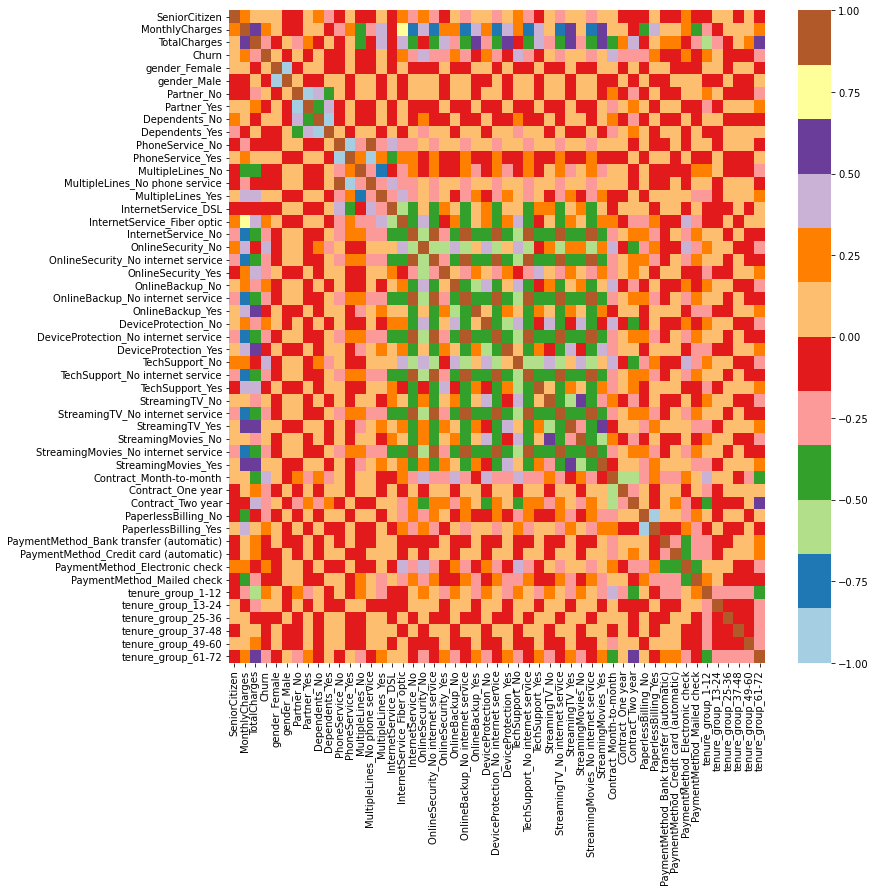

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_copy_dummies.corr(),cmap='Paired')

# Model Building

In [72]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [75]:
df=telco_copy_dummies.copy()

In [85]:
#Creating X and Y variables.

x=df.drop('Churn',axis=1)


In [83]:
y=df['Churn']


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [88]:
model=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [89]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [90]:
y_pred=model.predict(x_test)

In [98]:
model.score(x_test,y_test)

0.7981520966595593

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1029
           1       0.67      0.49      0.57       378

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [107]:
print(confusion_matrix(y_test,y_pred))

[[936  93]
 [191 187]]


In [109]:
sm=SMOTEENN()
x_resampled,y_resampled=sm.fit_resample(x,y)

In [111]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [113]:
model_resampled=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [114]:
model_resampled.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [116]:
y_pred_resampled=model_resampled.predict(xr_test)

In [117]:
print(classification_report(yr_test,y_pred_resampled))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       520
           1       0.94      0.93      0.93       645

    accuracy                           0.93      1165
   macro avg       0.92      0.93      0.93      1165
weighted avg       0.93      0.93      0.93      1165



In [119]:
print(confusion_matrix(yr_test,y_pred_resampled))

[[481  39]
 [ 47 598]]


### Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [123]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [125]:
yrf_pred=model_rf.predict(x_test)

In [126]:
print(classification_report(y_test,yrf_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1029
           1       0.70      0.44      0.54       378

    accuracy                           0.80      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.79      0.80      0.78      1407



In [128]:
sm=SMOTEENN()
x_resampled_rf,y_resampled_rf=sm.fit_resample(x,y)

In [134]:
xrf_train,xrf_test,yrf_train,yrf_test=train_test_split(x_resampled_rf,y_resampled_rf,test_size=0.2)

In [135]:
model_resampled_rf=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [136]:
model_resampled_rf.fit(xrf_train,yrf_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [137]:
yrf_pred_resampled=model_resampled.predict(xrf_test)

In [138]:
print(classification_report(yrf_test,yrf_pred_resampled))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       551
           1       0.94      0.92      0.93       628

    accuracy                           0.93      1179
   macro avg       0.92      0.93      0.93      1179
weighted avg       0.93      0.93      0.93      1179

